In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def plot_max_discharge_capacity(directory):
    # Lister tous les fichiers CSV dans le répertoire donné
    csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

    # Créer une figure pour le graphique
    plt.figure(figsize=(12, 6))  # Augmenter la largeur de la figure

    # #Lire et tracer le maximum de Discharge Capacity pour chaque fichier CSV
    for csv_file in csv_files:
        file_path = os.path.join(directory, csv_file)
        df = pd.read_csv(file_path)

        # Calculer le maximum de Discharge Capacity par Cycle_Index
        max_discharge_capacity = df.groupby('Cycle_Index')['Discharge_Capacity'].max()

        # Tracer le maximum de Discharge Capacity pour chaque Cycle_Index
        plt.plot(max_discharge_capacity.index, max_discharge_capacity.values, label=csv_file)

    plt.xlabel('Cycle Index')
    plt.ylabel('Maximum Discharge Capacity')
    plt.title('Maximum Discharge Capacity vs Cycle Index')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Placer la légende à l'extérieur du graphique
    plt.grid(True)
    plt.tight_layout()  # Ajuster le layout pour que tout soit visible
    plt.show()





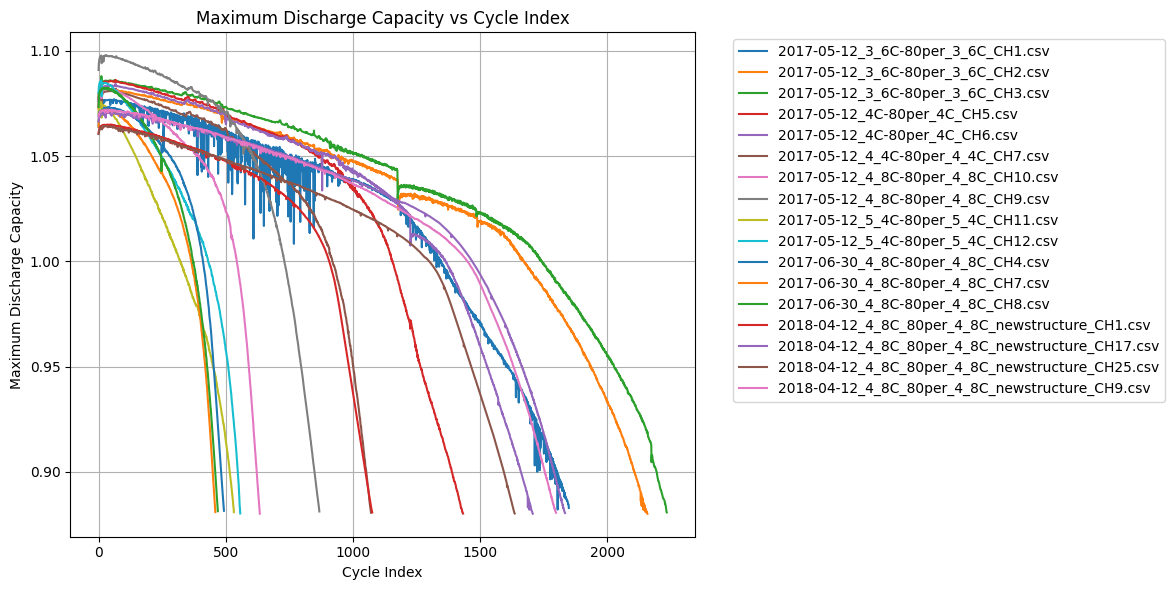

In [22]:

# Exemple d'utilisation
directory = r'C:\Users\pc\Desktop\data\all batchs'  # Utilisation de r pour les chemins Windows
plot_max_discharge_capacity(directory)

Cycle index VS Discharge capacity

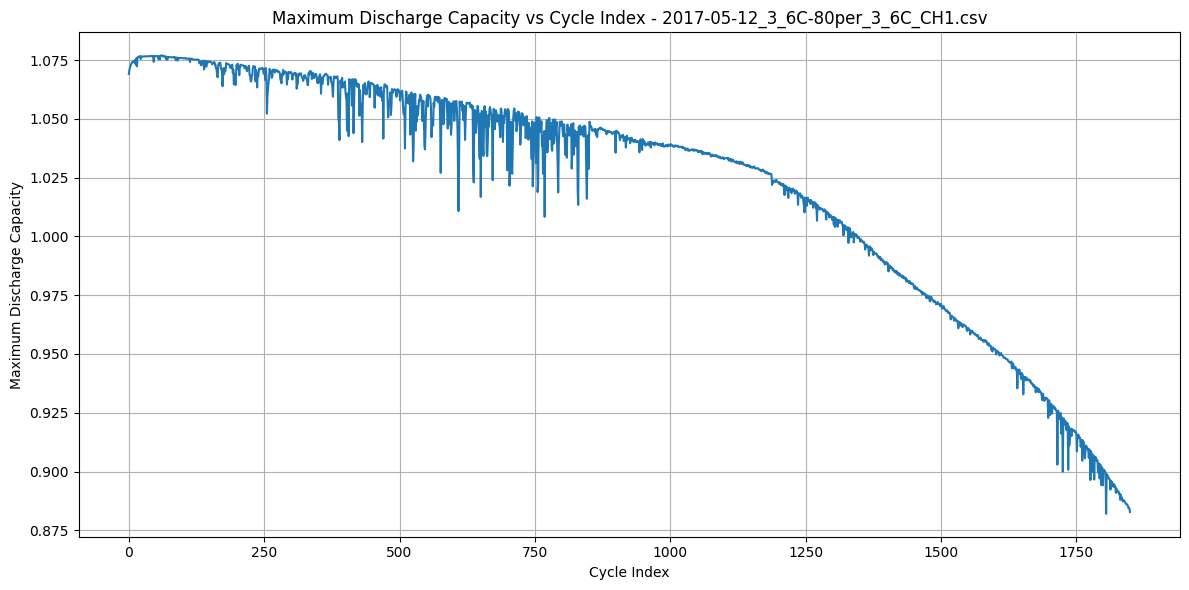

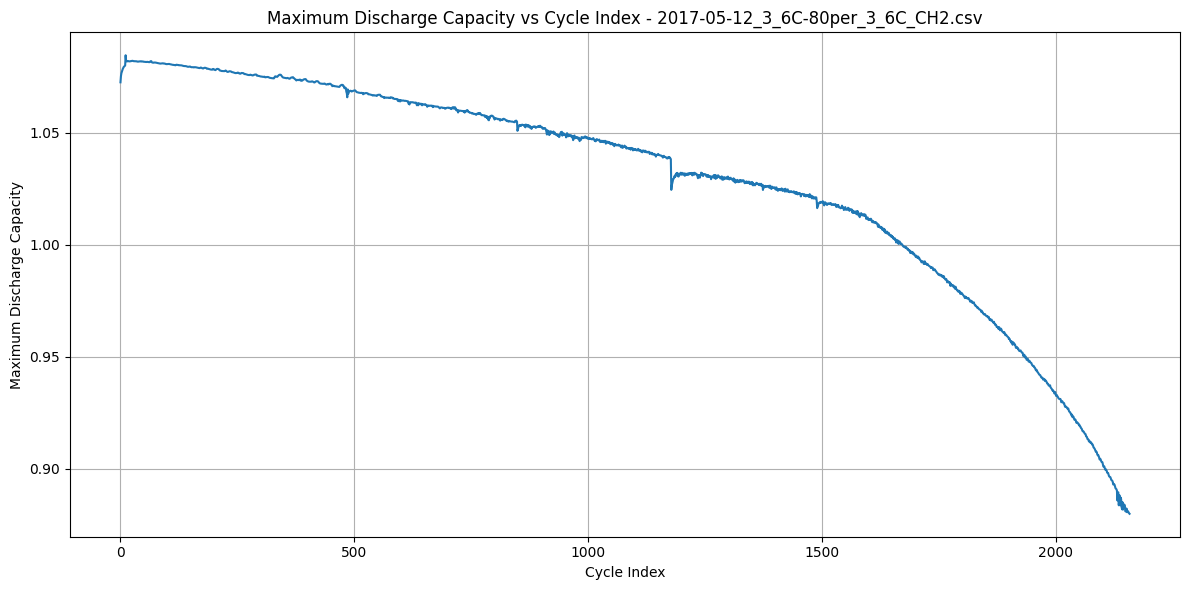

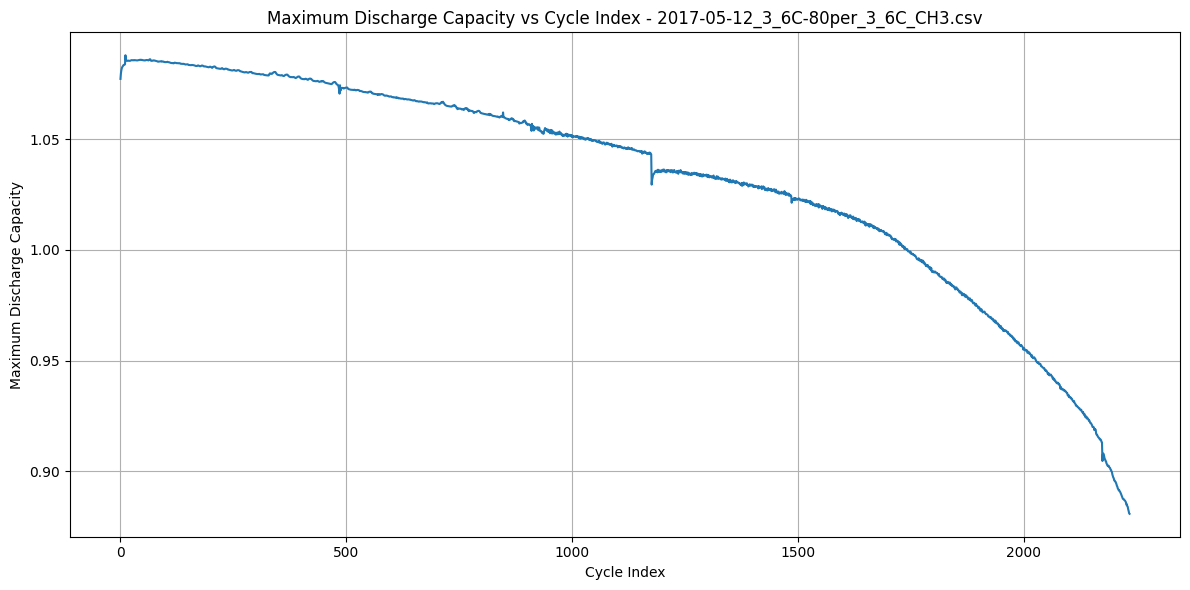

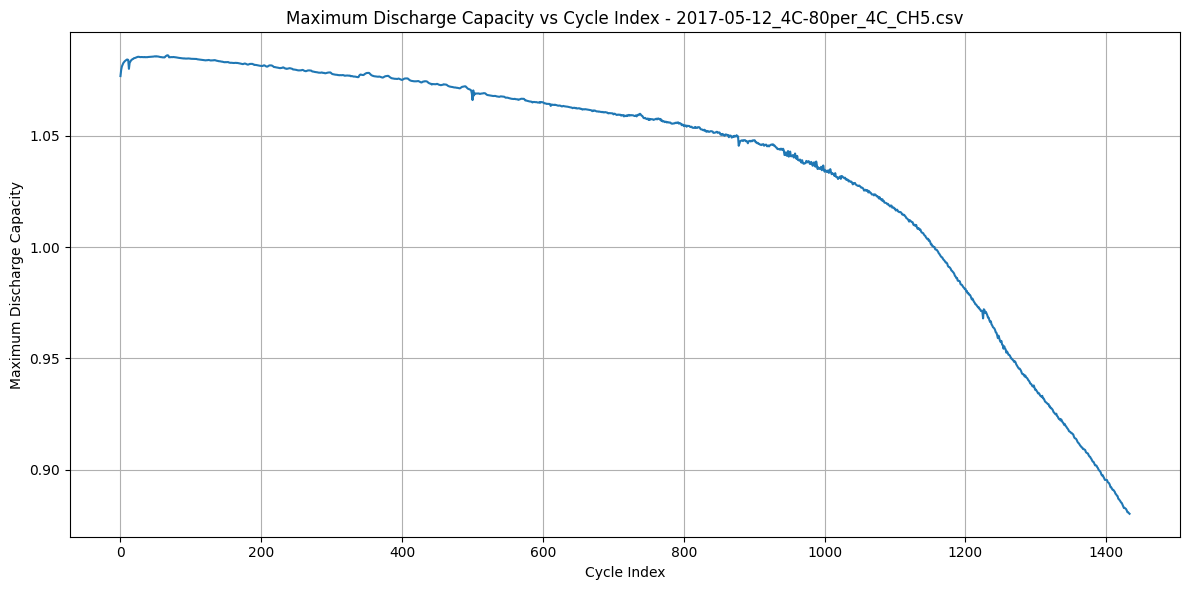

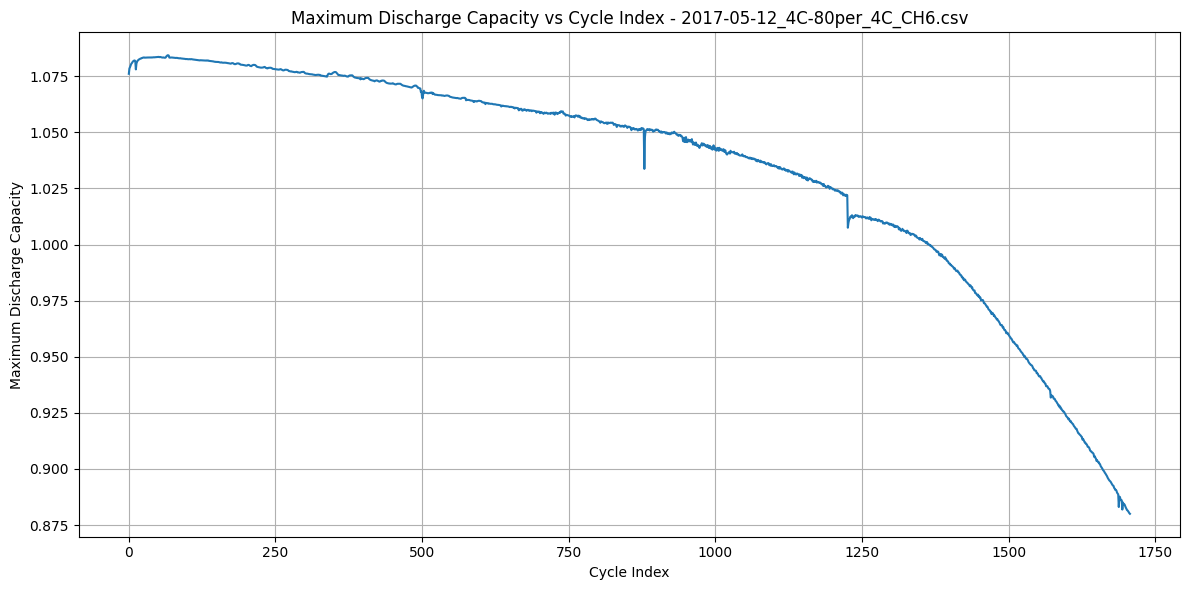

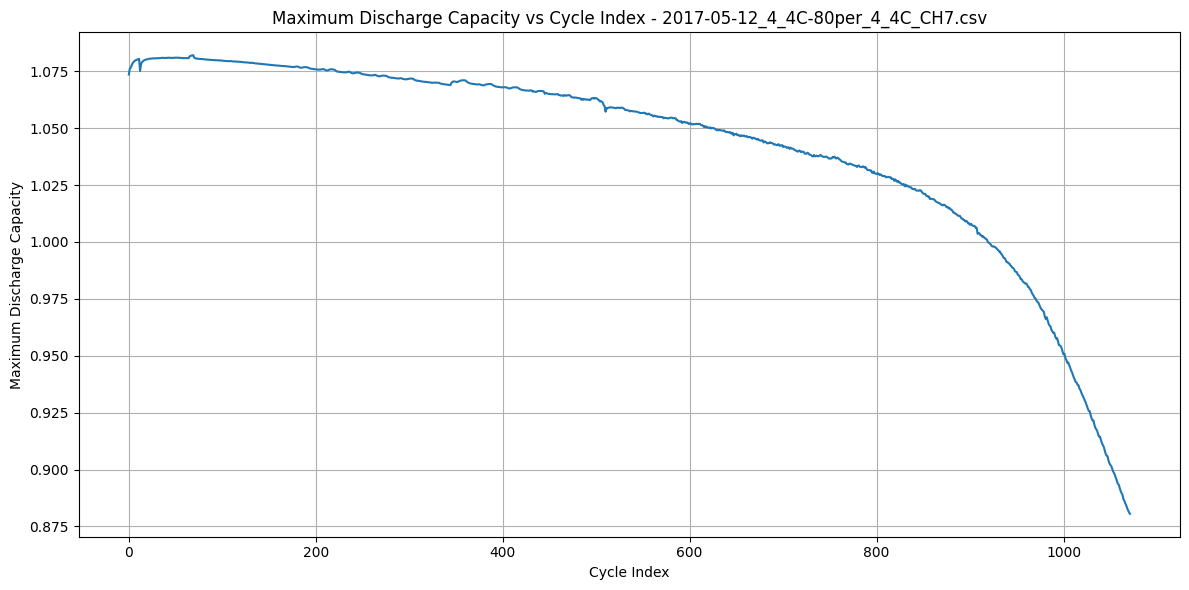

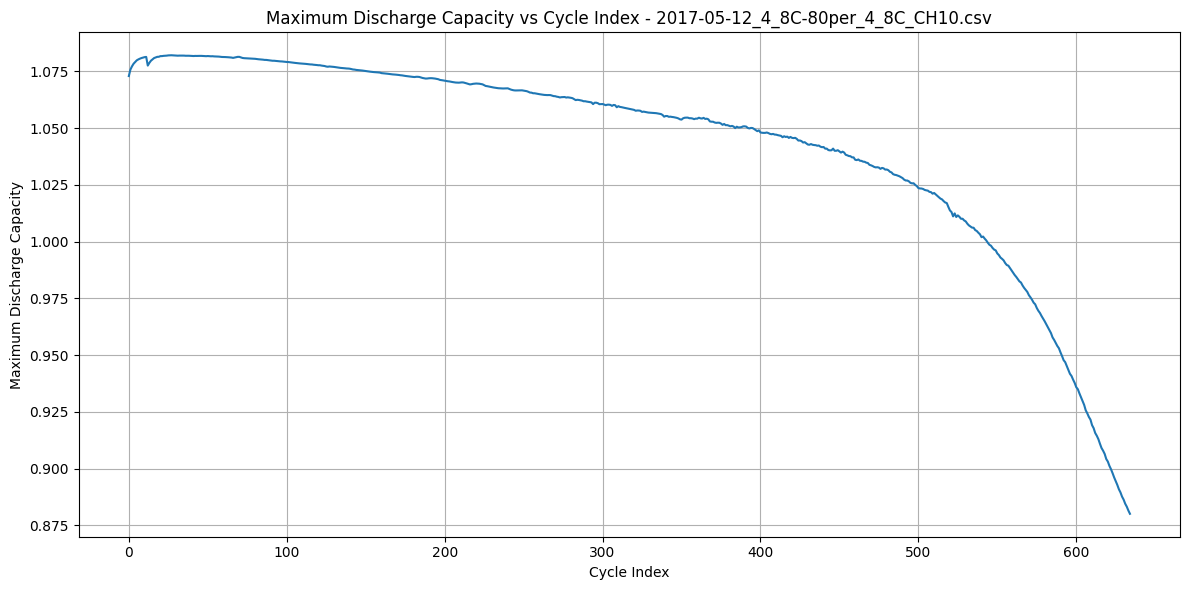

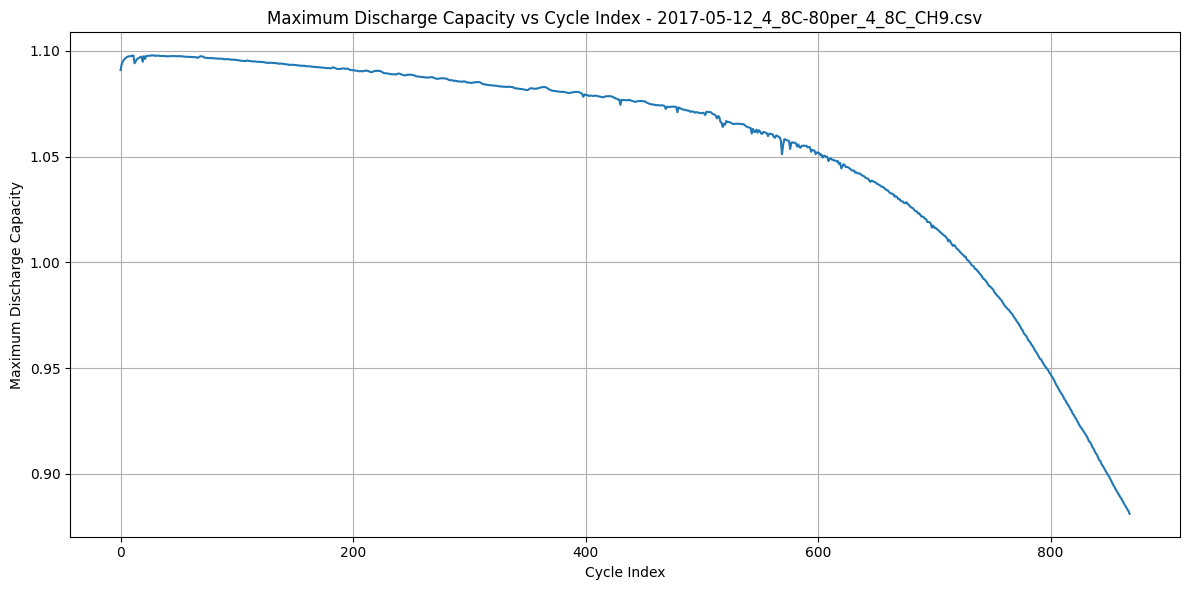

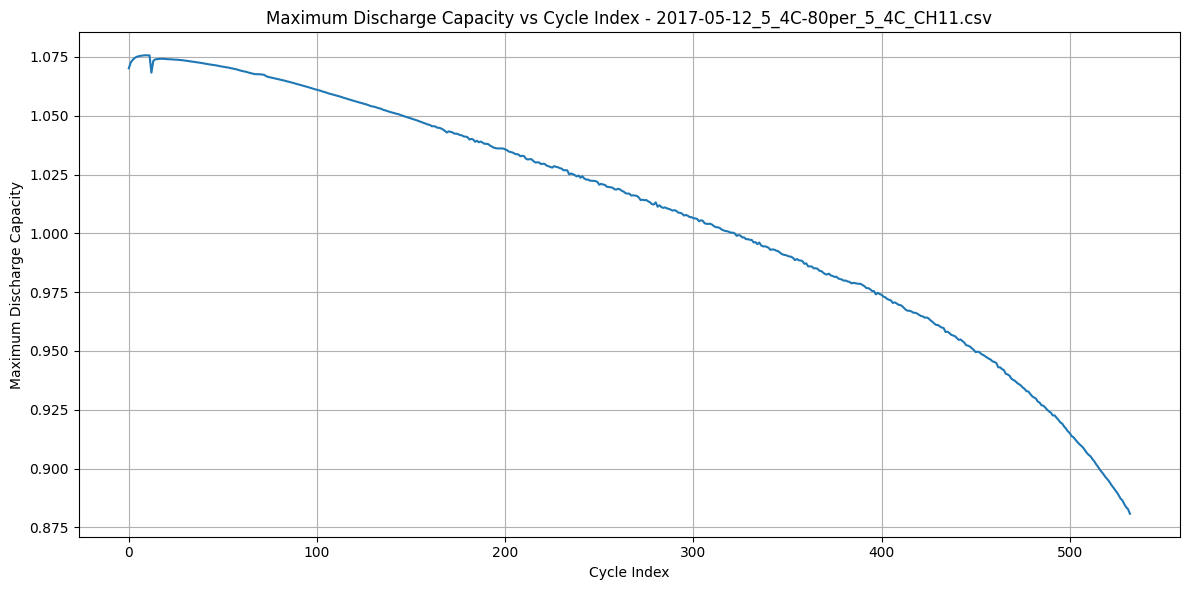

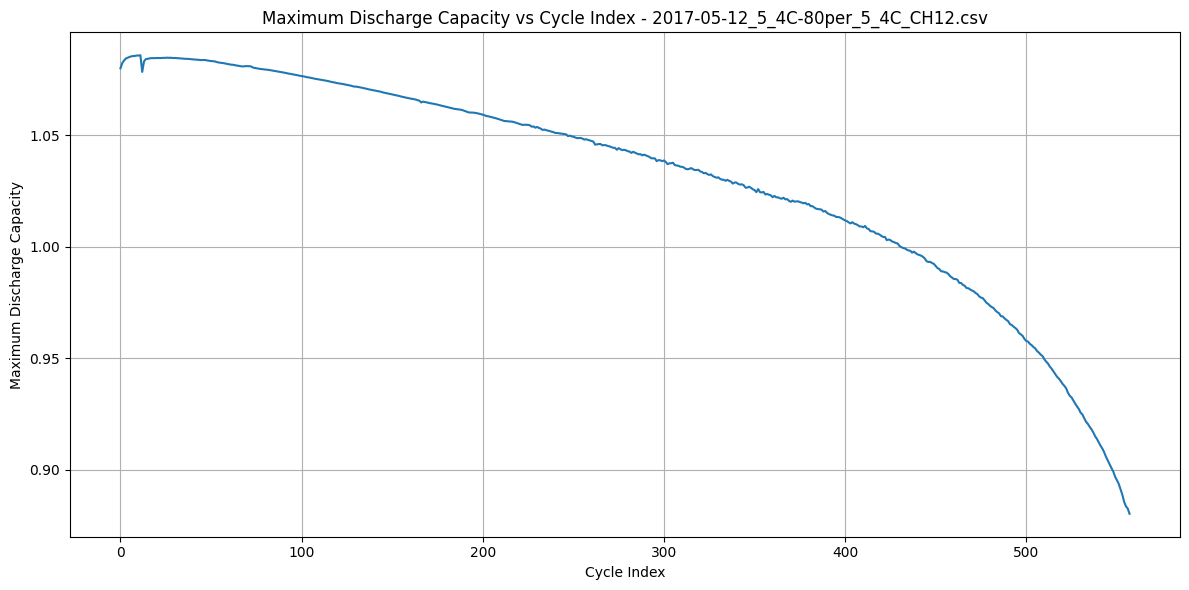

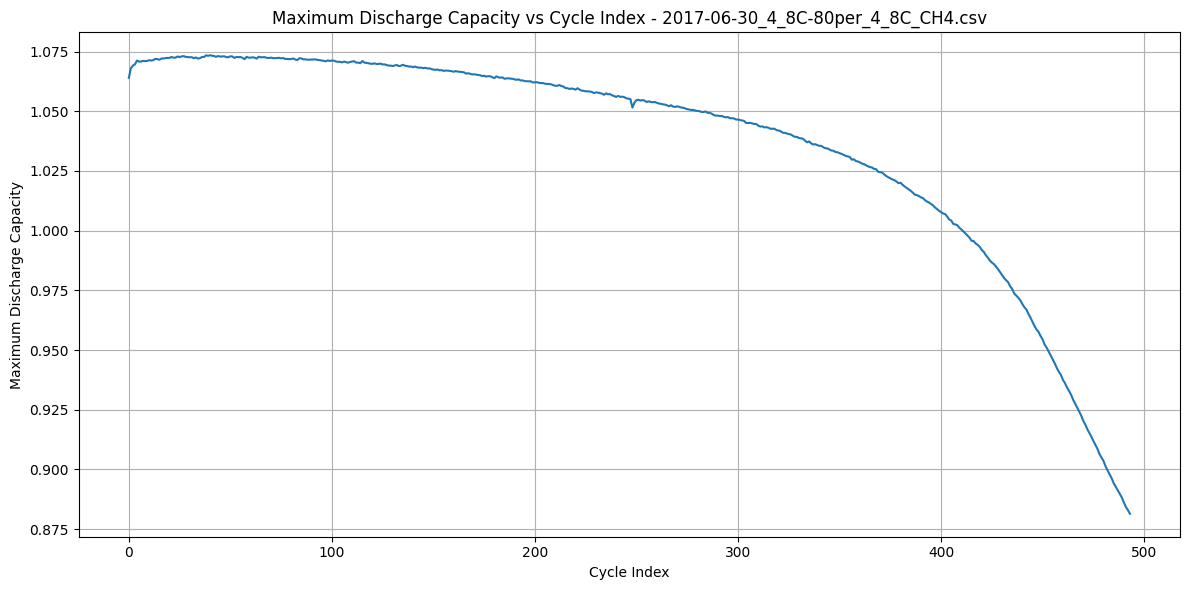

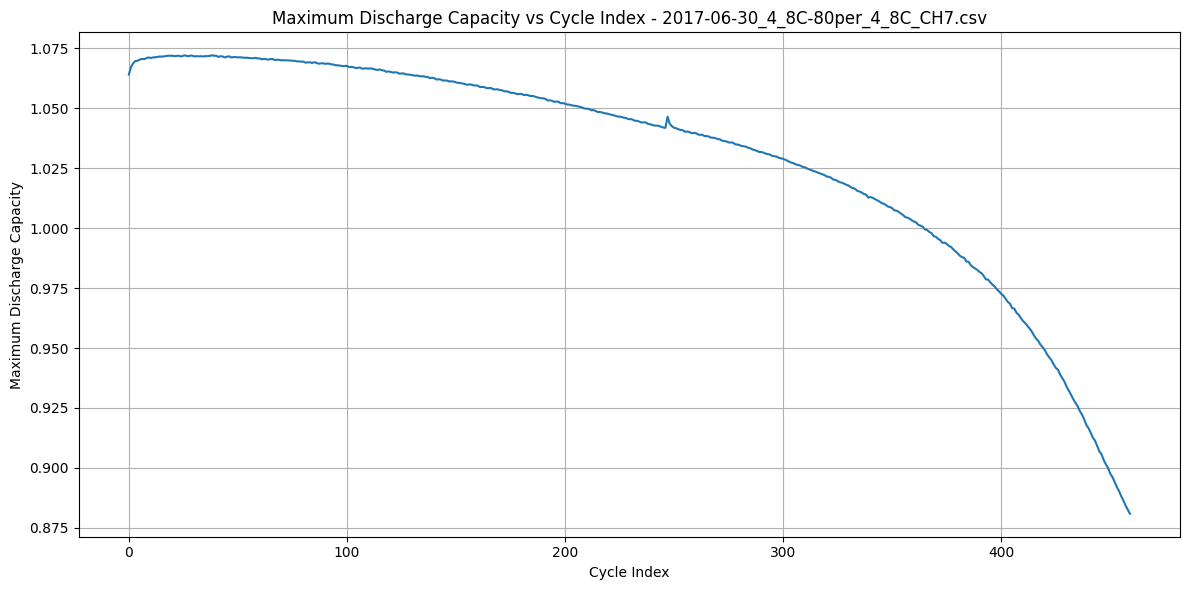

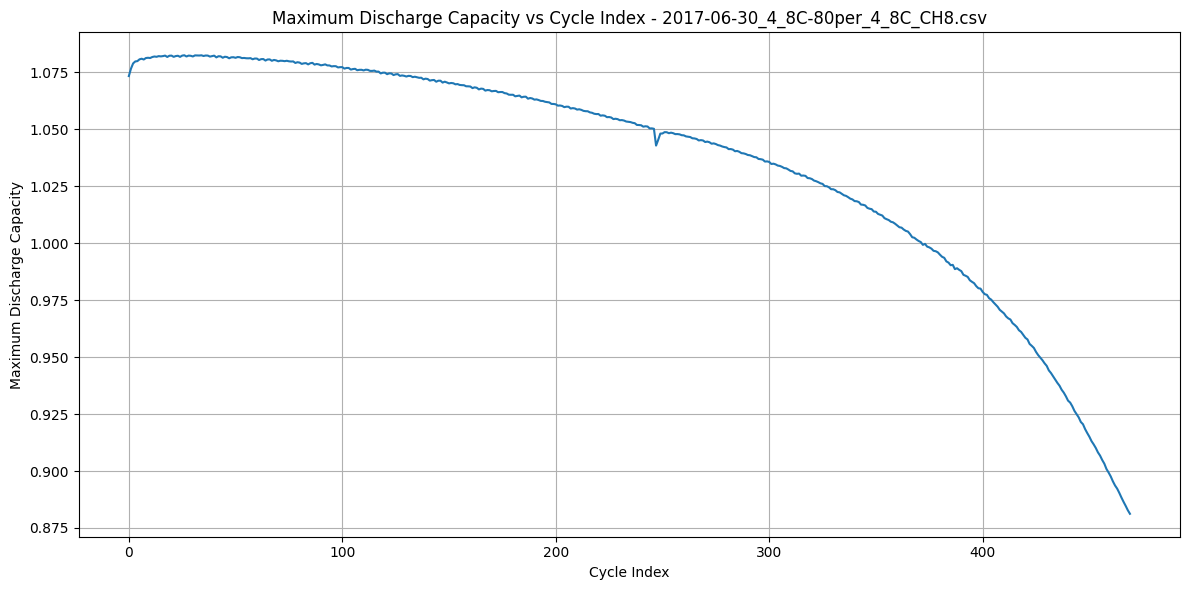

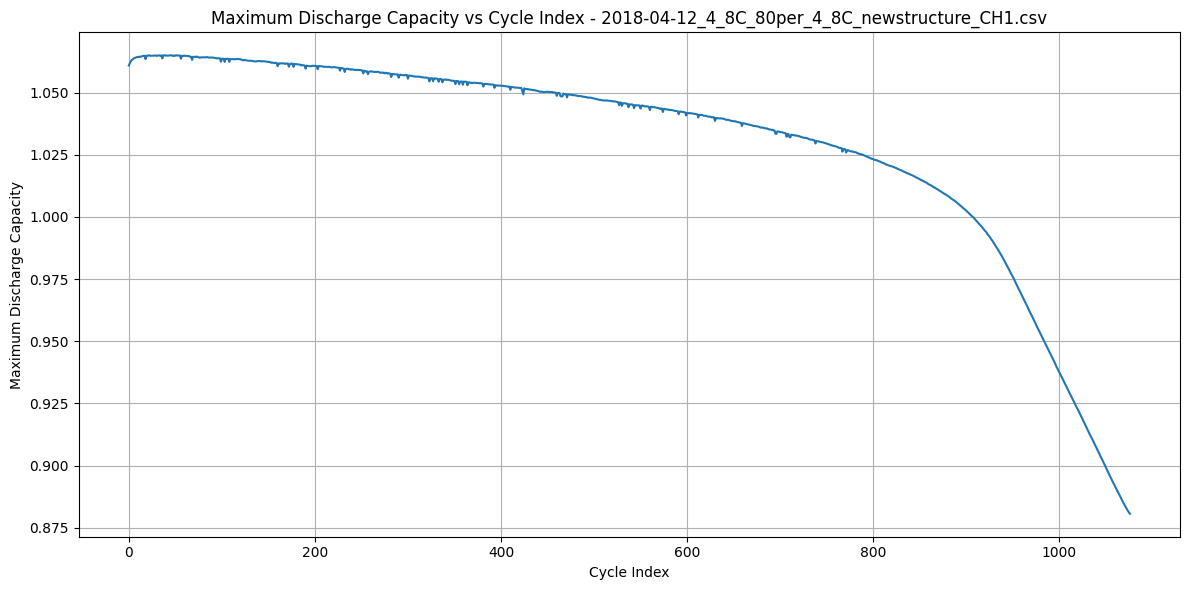

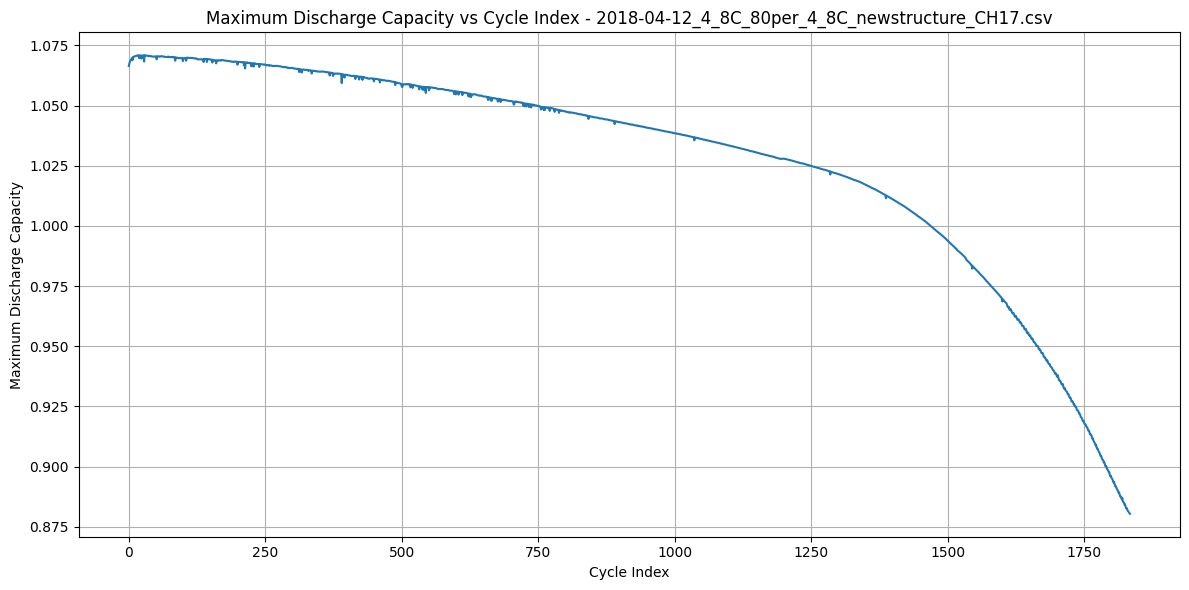

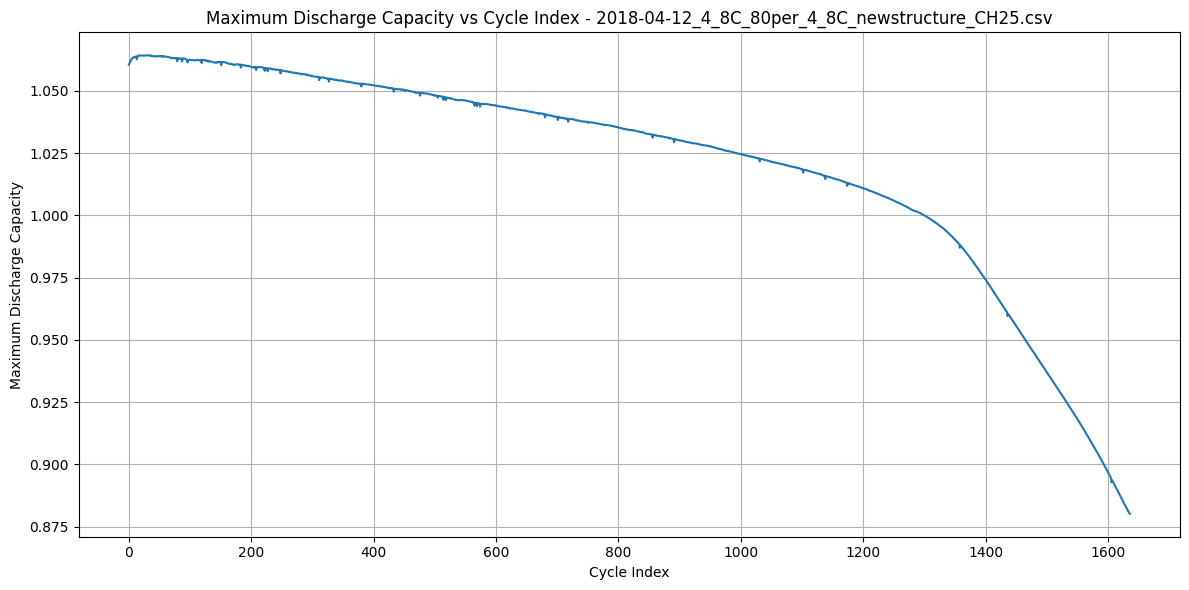

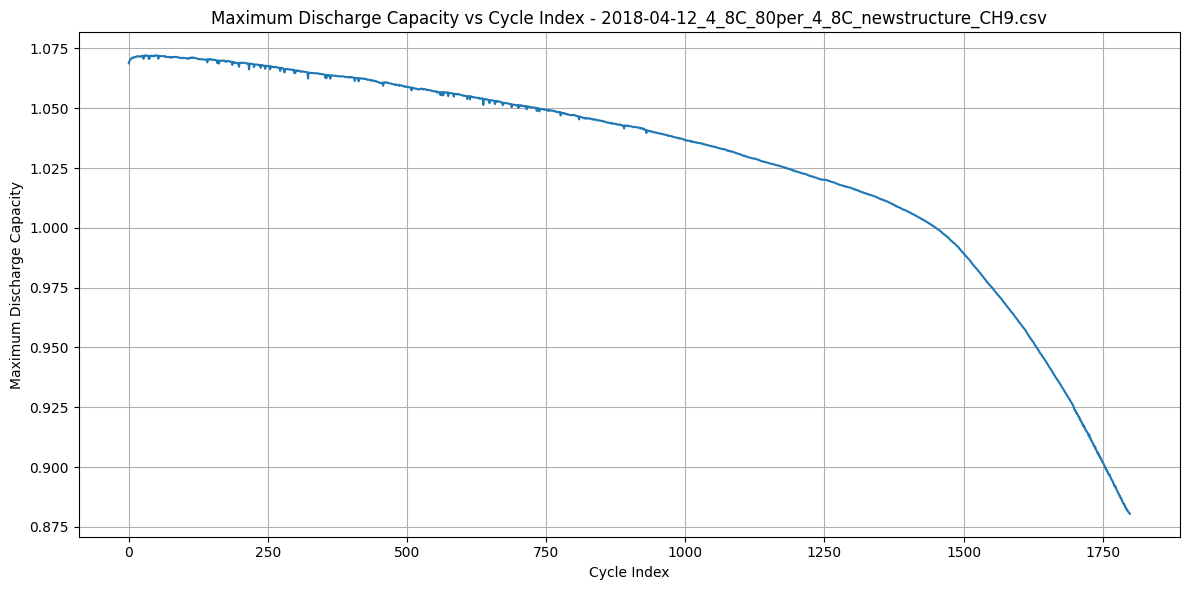

In [28]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Répertoire contenant les fichiers CSV
directory = r'C:\Users\pc\Desktop\data\all batchs' 
csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

# Lire et tracer le maximum de Discharge Capacity pour chaque fichier CSV
for csv_file in csv_files:
    file_path = os.path.join(directory, csv_file)
    df = pd.read_csv(file_path)

    # Calculer le maximum de Discharge Capacity par Cycle_Index
    max_discharge_capacity = df.groupby('Cycle_Index')['Discharge_Capacity'].max()

    # Filtrer les cycles où le max Discharge Capacity est > 1.1 ou < 0.88
    filtered_cycles = max_discharge_capacity[(max_discharge_capacity > 1.1) | (max_discharge_capacity < 0.88)]

    # Afficher les numéros de cycle correspondant
    if not filtered_cycles.empty:
        print(f"Fichier : {csv_file}")
        print("Cycle_Index où le max Discharge Capacity est > 1.1 ou < 0.88 :")
        print(filtered_cycles)
        print("\n")

    # Tracer le maximum de Discharge Capacity pour chaque Cycle_Index
    plt.figure(figsize=(12, 6)) 
    plt.plot(max_discharge_capacity.index, max_discharge_capacity.values, label=csv_file)
    plt.xlabel('Cycle Index')
    plt.ylabel('Maximum Discharge Capacity')
    plt.title(f'Maximum Discharge Capacity vs Cycle Index - {csv_file}')
    #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Placer la légende à l'extérieur du graphique
    plt.grid(True)
    plt.tight_layout()  # Ajuster le layout pour que tout soit visible
    
    # Afficher le graphique
    plt.show()


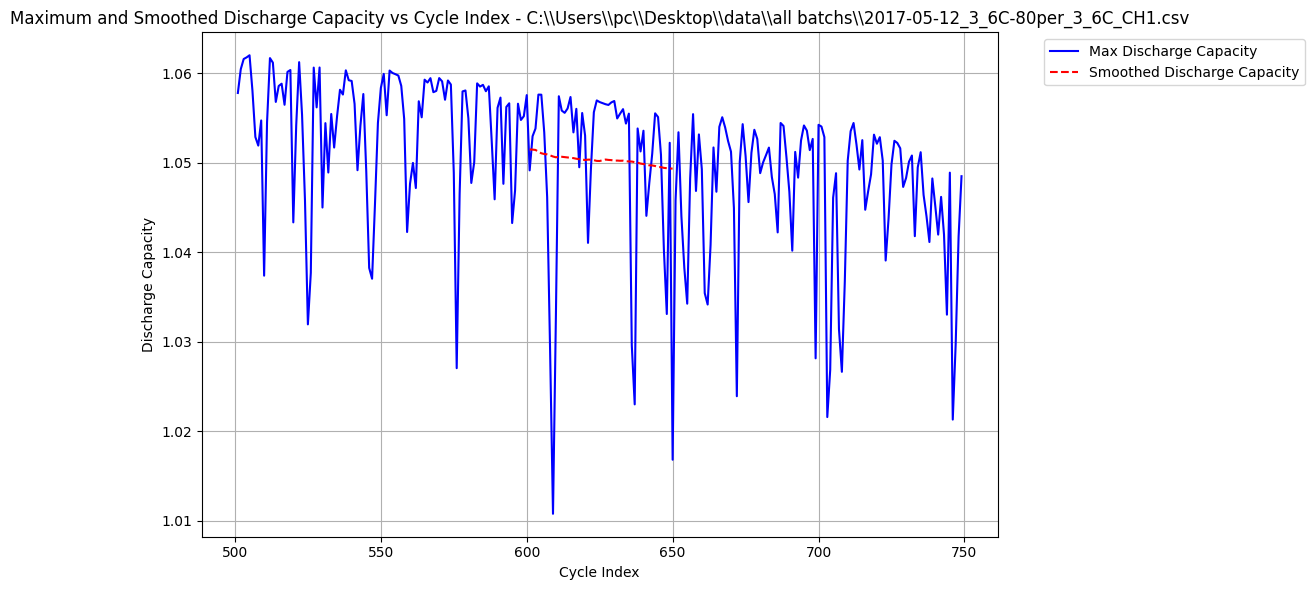

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

directory = r'C:\\Users\\pc\\Desktop\\data\\all batchs\\2017-05-12_3_6C-80per_3_6C_CH1.csv' 

# Lire le fichier CSV
df = pd.read_csv(directory)
df = df[(df['Cycle_Index'] < 750) & (df['Cycle_Index'] > 500)]

# Calculer le maximum de Discharge Capacity par Cycle_Index
max_discharge_capacity = df.groupby('Cycle_Index')['Discharge_Capacity'].max()

# Appliquer le lissage par moyenne glissante
window_size = 200  # Taille de la fenêtre pour la moyenne glissante
smoothed_discharge_capacity = max_discharge_capacity.rolling(window=window_size, center=True).mean()

# Filtrer les cycles où le max Discharge Capacity est > 1.1 ou < 0.88
filtered_cycles = max_discharge_capacity[(max_discharge_capacity > 1.1) | (max_discharge_capacity < 0.88)]

# Afficher les numéros de cycle correspondant
if not filtered_cycles.empty:
    print(f"Fichier : {directory}")
    print("Cycle_Index où le max Discharge Capacity est > 1.1 ou < 0.88 :")
    print(filtered_cycles)
    print("\n")

# Tracer le maximum de Discharge Capacity et la courbe lissée pour chaque Cycle_Index
plt.figure(figsize=(12, 6)) 
plt.plot(max_discharge_capacity.index, max_discharge_capacity.values, label='Max Discharge Capacity', color='blue')
plt.plot(smoothed_discharge_capacity.index, smoothed_discharge_capacity.values, label='Smoothed Discharge Capacity', color='red', linestyle='--')
plt.xlabel('Cycle Index')
plt.ylabel('Discharge Capacity')
plt.title(f'Maximum and Smoothed Discharge Capacity vs Cycle Index - {directory}')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Placer la légende à l'extérieur du graphique
plt.grid(True)
plt.tight_layout()  # Ajuster le layout pour que tout soit visible

# Afficher le graphique
plt.show()
